# Convolutional Neural Networks

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_set_name = os.path.join(os.getcwd(), 'data/mnist_train.csv')
test_set_name = os.path.join(os.getcwd(), 'data/mnist_test.csv')

df_train = pd.read_csv(train_set_name, engine='python')
df_test = pd.read_csv(test_set_name, engine='python')

df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
random_sel = df_train.sample(8)
random_sel.shape

(8, 785)

In [4]:
image_features = random_sel.drop('label', axis=1)
image_batch = torch.Tensor(image_features.values / 255).reshape((-1, 28, 28))
image_batch.shape

torch.Size([8, 28, 28])

In [5]:
grid = torchvision.utils.make_grid(image_batch.unsqueeze(1), nrow=8)
grid.shape

torch.Size([3, 32, 242])

(-0.5, 241.5, 31.5, -0.5)

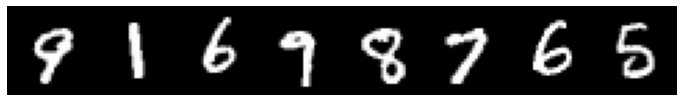

In [6]:
plt.figure(figsize=(12, 12))
plt.imshow(grid.numpy().transpose((1, 2, 0)))
plt.axis('off')

In [0]:
mnist_train_features = df_train.drop('label', axis=1)
mnist_train_target = df_train['label']

mnist_test_features = df_test.drop('label', axis=1)
mnist_test_target = df_test['label']

In [0]:
X_train_tensor = torch.tensor(mnist_train_features.values, dtype=torch.float)
x_test_tensor = torch.tensor(mnist_test_features.values, dtype=torch.float)

Y_train_tensor = torch.tensor(mnist_train_target.values, dtype=torch.long)
y_test_tensor = torch.tensor(mnist_test_target.values, dtype=torch.long)

In [0]:
X_train_tensor = X_train_tensor.reshape(-1, 1, 28, 28)
x_test_tensor = x_test_tensor.reshape(-1, 1, 28, 28)

In [0]:
in_size = 1

hid1_size = 16
hid2_size = 32

out_size = 10

k_conv_size = 5

In [0]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_size, hid1_size, k_conv_size), 
            nn.BatchNorm2d(hid1_size), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(hid1_size, hid2_size, k_conv_size), 
            nn.BatchNorm2d(hid2_size), 
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=2))
        
        self.fc = nn.Linear(512, out_size)
    
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        
        return F.log_softmax(out, -1)

In [0]:
model = ConvNet()

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [14]:
model.to(device)

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [0]:
X_train_tensor = X_train_tensor.to(device)
x_test_tensor = x_test_tensor.to(device)

Y_train_tensor = Y_train_tensor.to(device)
y_test_tensor = y_test_tensor.to(device)

In [0]:
learning_rate = 0.005
criterion = nn.NLLLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [0]:
num_epochs = 50
loss_values = []

In [18]:
for epoch in range(1, num_epochs):
    outputs = model.forward(X_train_tensor)
    loss = criterion(outputs, Y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    print('Epoch – %d, loss – %0.5f'%(epoch, loss.item()))
    loss_values.append(loss.item())

Epoch – 1, loss – 2.48898
Epoch – 2, loss – 1.97546
Epoch – 3, loss – 1.44802
Epoch – 4, loss – 1.07615
Epoch – 5, loss – 0.88218
Epoch – 6, loss – 0.72904
Epoch – 7, loss – 0.58930
Epoch – 8, loss – 0.48747
Epoch – 9, loss – 0.42867
Epoch – 10, loss – 0.38824
Epoch – 11, loss – 0.35226
Epoch – 12, loss – 0.31871
Epoch – 13, loss – 0.29077
Epoch – 14, loss – 0.27022
Epoch – 15, loss – 0.25542
Epoch – 16, loss – 0.24323
Epoch – 17, loss – 0.23142
Epoch – 18, loss – 0.21942
Epoch – 19, loss – 0.20784
Epoch – 20, loss – 0.19748
Epoch – 21, loss – 0.18869
Epoch – 22, loss – 0.18129
Epoch – 23, loss – 0.17485
Epoch – 24, loss – 0.16898
Epoch – 25, loss – 0.16342
Epoch – 26, loss – 0.15804
Epoch – 27, loss – 0.15285
Epoch – 28, loss – 0.14792
Epoch – 29, loss – 0.14334
Epoch – 30, loss – 0.13914
Epoch – 31, loss – 0.13530
Epoch – 32, loss – 0.13172
Epoch – 33, loss – 0.12832
Epoch – 34, loss – 0.12507
Epoch – 35, loss – 0.12198
Epoch – 36, loss – 0.11907
Epoch – 37, loss – 0.11631
Epoch – 38

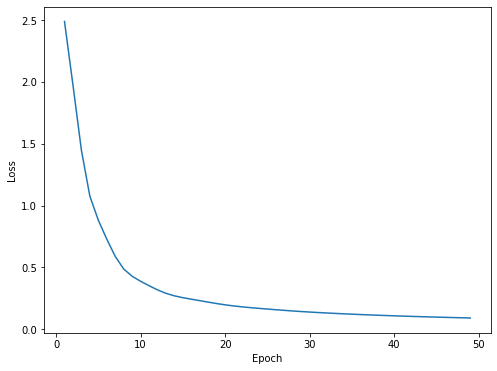

In [19]:
x = range(1, 50)

plt.figure(figsize=(8, 6))
plt.plot(x, loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [20]:
model.eval()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Linear(in_features=512, out_features=10, bias=True)
)

In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

with torch.no_grad():
    outputs = model(x_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    
    y_test = y_test_tensor.cpu().numpy()
    predicted = predicted.cpu()
    
    print('Accuracy score: ', accuracy_score(predicted, y_test))
    print('Precision score: ', precision_score(predicted, y_test, average='weighted'))
    print('Recall score: ', recall_score(predicted, y_test, average='weighted'))

Accuracy score:  0.977
Precision score:  0.9771708924691924
Recall score:  0.977
